<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

## Note:
I changed this `secret.py` file into yaml credentials. 
The structure of the yaml is as follows:
<code>
REDDIT:
    REDDIT_API_CLIENT_ID: "your client id"
    REDDIT_API_CLIENT_SECRET: "your secret"
    REDDIT_API_USER_AGENT: "Your app name"
</code>

My file was stored at `../credentials/secrets_reddit.yaml`, if you want to change it, you should edit the `CREDENTIALS_FILE` variable int `Task I` and `parse_args()` function in `Task IV`.


# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [1]:
import yaml
import praw

CREDENTIALS_FILE = '../credentials/secrets_reddit.yaml'

with open(CREDENTIALS_FILE, "r") as f:
    credentials = yaml.safe_load(f)
    CLIENT_ID = credentials['REDDIT']['REDDIT_API_CLIENT_ID']
    CLIENT_SECRET = credentials['REDDIT']['REDDIT_API_CLIENT_SECRET']
    USER_AGENT = credentials['REDDIT']['REDDIT_API_USER_AGENT']

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    #password="PASSWORD",
    user_agent=USER_AGENT,
    #username="USERNAME",
)

In [2]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected outputs you will see are from `r/machinelearning` unless otherwise specified.

In [3]:
# YOUR CODE HERE
subreddit = reddit.subreddit('machinelearning')
subreddit.title

'Machine Learning'

What is the display name of the subreddit?

In [4]:
# YOUR CODE HERE
print (subreddit.display_name)

MachineLearning


<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [5]:
# YOUR CODE HERE
print (f'Title: {subreddit.title}')
print (f'Display Name: {subreddit.display_name}')


Title: Machine Learning
Display Name: MachineLearning


<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [6]:
# YOUR CODE HERE
print (subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [7]:
# try run this line, what do you see? press q once you are done
?subreddit.top 

Signature:
subreddit.top (
    *,
    time_filter: str = 'all',
    **generator_kwargs: Union[str, int, Dict[str, str]],
) -> Iterator[Any]
Docstring:
Return a :class:`.ListingGenerator` for top items.

:param time_filter: Can be one of: ``"all"``, ``"day"``, ``"hour"``,
    ``"month"``, ``"week"``, or ``"year"`` (default: ``"all"``).

:raises: :py:class:`ValueError` if ``time_filter`` is invalid.

Additional keyword arguments are passed in the initialization of
:class:`.ListingGenerator`.

This method can be used like:

.. code-block:: python

    reddit.domain("imgur.com").top(time_filter="week")
    reddit.multireddit(redditor="samuraisam", name="programming").top(time_filter="day")
    reddit.redditor("spez").top(time_filter="month")
    reddit.redditor("spez").comments.top(time_filter="year")
    reddit.redditor("spez").submissions.top(time_filter="all")
    reddit.subreddit("all").top(time_filter="hour")
File:      ~/anaconda3/envs/volumes/lib/python3.7/site-packages/praw/models/

In [8]:
# YOUR CODE HERE
for idx, topic in enumerate(subreddit.top(limit=10)):
    print (topic.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [9]:
# YOUR CODE HERE
for idx, topic in enumerate(subreddit.top(limit=10, time_filter='week')):
    print (topic.title)

30% of Google's Reddit Emotions Dataset is Mislabeled [D]
[R] mixed reality future — see the world through artistic lenses — made with NeRF
[N] First-Ever Course on Transformers: NOW PUBLIC
[D] Why are Corgi dogs so popular in machine learning (especially in the image generation community)?
[D] Are there any rejected papers that ended up having significant impact in the long run?
[D] Noam Chomsky on LLMs and discussion of LeCun paper (MLST)
[N] Andrej Karpathy is leaving Tesla
[R] So someone actually peer-reviewed this and thought "yeah, looks good"?
[D] How do you verify the novelty of your research?
[N] BigScience Releases their 176 Billion Parameter Open-access Multilingual Language Model


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [10]:
# YOUR CODE HERE
import pandas as pd
df = pd.DataFrame(columns = ('Title', 'Author', 'Upvote ratio', 'Score'))
for idx, topic in enumerate(subreddit.top(limit=10, time_filter='week')):
    df.loc[idx, :] = (topic.title, topic.author, topic.upvote_ratio, topic.score)
df

,Title,Author,Upvote ratio,Score
0,30% of Google's Reddit Emotions Dataset is Mis...,BB4evaTB12,0.98,865
1,[R] mixed reality future — see the world throu...,SpatialComputing,0.96,355
2,[N] First-Ever Course on Transformers: NOW PUBLIC,DragonLord9,0.92,351
3,[D] Why are Corgi dogs so popular in machine l...,Azuresonance,0.92,314
4,[D] Are there any rejected papers that ended u...,TheSurvivingHalf,0.98,288
5,[D] Noam Chomsky on LLMs and discussion of LeC...,timscarfe,0.88,277
6,[N] Andrej Karpathy is leaving Tesla,EffectSizeQueen,0.94,274
7,[R] So someone actually peer-reviewed this and...,fanconic,0.96,240
8,[D] How do you verify the novelty of your rese...,ajt9000,0.99,181
9,[N] BigScience Releases their 176 Billion Para...,MonLiH,0.98,183


💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

## Answer
I am not sure about the meaning of this question. If by `ethical data` you mean the data that should not be displayed to everyone, then not really, at least not in Machine learning. However, there is this `over_18` feature that may serve such a purpose in other cases.

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [11]:
%%time
from praw.models import MoreComments

# YOUR COMMENT HERE
top_comments = []
# YOUR COMMENT HERE
# Iterate over top 10 topics ever
for submission in subreddit.top(limit=10):
    # YOUR COMMENT HERE
    # For each topic iterate over all comments
    # Each comment may be an inscance of either `comment` or `MoreComments` class. 
    for top_level_comment in submission.comments:
        # YOUR COMMENT HERE
        # If the comment is an instance of `MoreComments` class, it contains subcomments
        # Here in the code we ignore it.
        if isinstance(top_level_comment, MoreComments):
            continue
        # YOUR COMMENT HERE
        # Otherwise, the comment is just a comment. We are added the body of such comment
        # to the list.
        top_comments.append(top_level_comment.body)


CPU times: user 239 ms, sys: 14.8 ms, total: 254 ms
Wall time: 2min 4s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [12]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
print (f'We extracted {len(top_comments)} comments. This number does not contain nested comments (instances of MoreComments class)')


We extracted 739 comments. This number does not contain nested comments (instances of MoreComments class)


In [13]:
import random

[random.choice(top_comments) for i in range(3)]

['u/fabiomb el otro día decías que andaba porque tenía fondo de color blanco plano.',
 'Alan Turing woke up from his grave?',
 'Since when did the sub start accepting memes??']

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

### Answer
I believe that the way of presenting this data (just bodies of comments) is not appropriate for analysis. I do not have any specific goal regarding this data, but addressing any business or research questions most likely requires analysis of both topics and comments, not comments only. My answer is that I would start with using a tree structure to store the data and check more than just the comments bodies. Just displaying comments is not enough; I can get better insight using Reddit directly, without API.

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [14]:
# YOUR CODE HERE
# I assume that I am supposed to exclude these MoreComments objects again.
subreddit_tsla = reddit.subreddit('TSLA')

top_comments_tsla = []
for submission in subreddit_tsla.top(limit=10):
    top_comments_tsla += [x.body for x in submission.comments if not isinstance(x, MoreComments)]

In [15]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

170

In [16]:
[random.choice(top_comments_tsla) for i in range(3)]

['FACTS SIR!!!😒😌😔😪',
 'Maybe we’re all a little crazy…but I’m holding and hoping that it’s a great call today. It will be brutal if there are surprises in Q1 or forecast. Hopefully Shanghai won’t be a reason for continued selling. Investors are in a bear mood over NFLX!',
 "I'm sure they will do it but only because we all know what it will do to the stock.  ;)"]

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

### Answer
From a data scientist perspective: judging the potential bias based on a few comments would introduce additional bias based on my own views and prejudices. We may safely assume that people writing in different subreddits may have different characteristics, but I would not dare to describe such characteristics based on the presented data.

Maybe I am missing the gist of this question, I could not participate in a live coding session. Sorry for this.


# CONTINUE HERE

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [17]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [18]:
sentiment_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [19]:
random.seed(42)
comment = random.choice(top_comments_tsla)

In [20]:
comment

"Just maybe it's happening now, adjusting value to expected earnings in an ever more competitive market"

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [21]:
sentiment = sentiment_model(comment)

What is the type of the output `sentiment`?

In [22]:
print ('Sentiment:', sentiment)
print (f'Sentiment type: {type(sentiment)}, Sentiment elem type: {type(sentiment[0])}')
print(sentiment[0])

Sentiment: [{'label': 'NEU', 'score': 0.8963178396224976}]
Sentiment type: <class 'list'>, Sentiment elem type: <class 'dict'>
{'label': 'NEU', 'score': 0.8963178396224976}


```
YOUR ANSWER HERE
```
It is a list of dictionaries. Each dictionary corresponds to one element from the input data and contains the label (POS/NEG/NEU for this particular model) and the score  that can be understood as a confidence level of the prediction (technically, it is probably the top softmax output, but I did not check the model code.)

In [23]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Just maybe it's happening now, adjusting value to expected earnings in an ever more competitive market
Predicted Label is NEU and the score is 0.896


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [29]:
%%writefile top_tlsa_comment_sentiment.py

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Tensorflow errors only

#import secrets
import yaml

import argparse
import random
from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def parse_args():
    parser=argparse.ArgumentParser(description="Setiment analysis script")
    parser.add_argument("-c", "--credentials", default='../credentials/secrets_reddit.yaml',
                        help="yaml with credentials")
    args=parser.parse_args()
    return args

def get_subreddit(display_name:str, credentials_file:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    with open(credentials_file, "r") as f:
        credentials = yaml.safe_load(f)    
        reddit = Reddit(
            client_id=credentials['REDDIT']['REDDIT_API_CLIENT_ID'],        
            client_secret=credentials['REDDIT']['REDDIT_API_CLIENT_SECRET'],
            user_agent=credentials['REDDIT']['REDDIT_API_USER_AGENT']
        )
    
    subreddit = reddit.subreddit(display_name=display_name)
    return subreddit


def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        #for top_level_comment in submission.comments:
        #    if isinstance(top_level_comment, MoreComments):
        #        continue
        #    top_comments.append(top_level_comment.body)
        top_comments += [x.body for x in submission.comments if not isinstance(x, MoreComments)]
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
    sentiment = sentiment_model(comment)
    return sentiment[0]



if __name__ == '__main__':
    args = parse_args()
    subreddit = get_subreddit('tsla', credentials_file=args.credentials)
    comments = get_comments(subreddit)
    comment = random.choice(comments)
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [30]:
!python top_tlsa_comment_sentiment.py

Downloading: 100%|█████████████████████████| 1.13k/1.13k [00:00<00:00, 1.54MB/s]
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
The comment: Give this man a raise! (In BTC)
Predicted Label is POS and the score is 0.978


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

In [26]:
def print_frequency(subreddit, message_id='', nr_submissions = 300):
    uct_list = []
    for submission in subreddit.new(limit=nr_submissions):
        uct_list.append(submission.created_utc)

    comment_dur = (max(uct_list) - min(uct_list)) / len(uct_list)

    print (f'{message_id}On average, there is a new submission every {comment_dur / 3600:.1f} hour. It gives {24*3600/comment_dur:.2f} submissions per day.')

print_frequency(subreddit_tsla, 'TESLA:            ')
print_frequency(subreddit,      'MACHINE_LEARNING: ')



TESLA:            On average, there is a new submission every 18.2 hour. It gives 1.32 submissions per day.
MACHINE_LEARNING: On average, there is a new submission every 1.9 hour. It gives 12.83 submissions per day.


### Answer
Machine learning is much more active subreddit. However, for a relatively niche area, Tesla is also doing well. A new post every 18 hours seems quite active to me.

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

In [27]:
import matplotlib.pyplot as plt

def get_authors(subreddit, nr_submissions = 300):
    df = pd.DataFrame(columns = ['nr_submissions'])
    for submission in subreddit.new(limit=300):
        author = submission.author
        if author in df.index:
            df.at[author, 'nr_submissions'] = df.at[author, 'nr_submissions'] + 1
        else:
            df.at[author, 'nr_submissions'] = 1
    return df

df_tsla = get_authors(subreddit_tsla)
df_ml = get_authors(subreddit)

<Figure size 432x288 with 0 Axes>

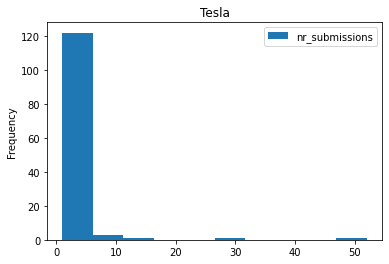

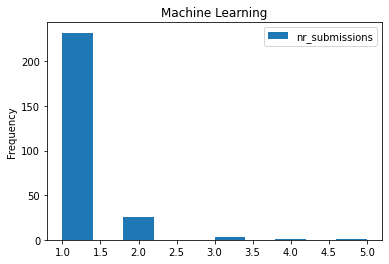

In [28]:
f = plt.figure()
df_tsla.plot.hist()
plt.title('Tesla')
df_ml.plot.hist()
plt.title('Machine Learning');


### Answer
Based on the last 300 submissions, the distribution of posters is large. It is larger in the ML group than in the Tesla group. It was expected. ML is a more general group, so more posters are involved.
